# Summer Trends
---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [40]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
load_dotenv()
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sdjac\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [41]:
# Read your api key environment variable
api_key = os.getenv("news_api")
len(api_key)

32

In [42]:
# Create a newsapi client
from newsapi import NewsApiClient
Database = NewsApiClient(api_key=api_key)

In [43]:
# Fetch the Bitcoin news articles
Heat_headlines = Database.get_everything(
    q="Heat",
    language="en",
    page_size=50, 
    sort_by="relevancy" 
)

In [44]:

# Fetch the Ethereum news articles
Refreshing_headlines = Database.get_everything(
    q="Refreshing",
    language="en",
    page_size=50, 
    sort_by="relevancy" 
)

In [45]:
# Create the Heat sentiment scores DataFrame
Heat_sentiments = []

for article in Heat_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Heat_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
        


# Create DataFrame
Heat_df = pd.DataFrame(Heat_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
Heat_df = Heat_df[cols]

Heat_df.head()



,date,text,compound,positive,negative,neutral
0,2022-05-25T20:00:00Z,"With temperatures rising in many places, lawn ...",0.0772,0.078,0.095,0.827
1,2022-05-19T22:36:23Z,"Under these conditions, she said, fires are re...",-0.1027,0.068,0.103,0.829
2,2022-05-28T09:00:41Z,"We dont own cars, so we cant drive to lakes an...",0.0000,0.000,0.000,1.000
3,2022-05-13T23:46:35Z,Democrats have giddily circulated their own re...,0.0000,0.000,0.000,1.000
4,2022-05-23T05:46:33Z,"Image caption, The rain led to traffic jams an...",-0.2732,0.000,0.060,0.940


In [46]:
# Create the Refreshing sentiment scores DataFrame
Refreshing_sentiments = []

for article in Refreshing_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Refreshing_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
        


# Create DataFrame
Refreshing_df = pd.DataFrame(Refreshing_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
Refreshing_df = Refreshing_df[cols]

Refreshing_df.head()

,date,text,compound,positive,negative,neutral
0,2022-05-27T16:00:16Z,Young golfers can now turn their physical surr...,0.3612,0.072,0.000,0.928
1,2022-06-07T20:19:17Z,Enlarge/ I'm pretty sure that's the Predator i...,0.8225,0.262,0.061,0.678
2,2022-05-13T15:00:07Z,I think we can all agree that having any degre...,0.6369,0.129,0.000,0.871
3,2022-06-10T20:00:11Z,"Some swear it tastes just like Coca-Cola, othe...",-0.4215,0.120,0.191,0.689
4,2022-05-23T14:00:00Z,The Odyssey Neo G8 in action. | Image: Samsung...,0.0000,0.000,0.000,1.000


In [47]:
# Describe the Heat Sentiment
Heat_df.describe()

,compound,positive,negative,neutral
count,50.000000,50.000000,50.000000,50.000000
mean,0.069540,0.069160,0.054680,0.876140
std,0.402807,0.073061,0.047832,0.087683
min,-0.739100,0.000000,0.000000,0.681000
25%,-0.190000,0.000000,0.000000,0.813000
50%,0.000000,0.059000,0.062000,0.882500
75%,0.382850,0.133250,0.087500,0.935000
max,0.865800,0.243000,0.185000,1.000000


In [48]:
# Describe the Ethereum Sentiment
Refreshing_df.describe()

,compound,positive,negative,neutral
count,50.000000,50.000000,50.000000,50.000000
mean,0.298802,0.107460,0.037840,0.854720
std,0.452626,0.090236,0.053343,0.104171
min,-0.726900,0.000000,0.000000,0.611000
25%,0.000000,0.039250,0.000000,0.780250
50%,0.350600,0.088500,0.000000,0.874000
75%,0.750600,0.195500,0.060500,0.935000
max,0.891200,0.286000,0.191000,1.000000


### Questions:

Q: 

A: 

Q: 

A: 

Q. 

A: 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [49]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [50]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of SWwords
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')


# Expand the default SWwords list if necessary
list(stop_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sdjac\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [51]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
#words = list(filter(lambda t: t not in punctuation, words))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)

    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lemmatizer = WordNetLemmatizer()
    lem = [lemmatizer.lemmatize(word) for word in words]
    
    # Remove the stop words
    # Convert the words to lowercase
    tokens = [word.lower() for word in lem if word.lower() not in stop_words]
        
    
    return tokens


In [52]:
# Create a new tokens column for Heat
Heat_df['tokens']=[tokenizer(word) for word in Heat_df['text']]
Heat_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-05-25T20:00:00Z,"With temperatures rising in many places, lawn ...",0.0772,0.078,0.095,0.827,"[temperature, rising, many, place, lawn, care,..."
1,2022-05-19T22:36:23Z,"Under these conditions, she said, fires are re...",-0.1027,0.068,0.103,0.829,"[condition, said, fire, really, easily, starte..."
2,2022-05-28T09:00:41Z,"We dont own cars, so we cant drive to lakes an...",0.0000,0.000,0.000,1.000,"[dont, car, cant, drive, lake, beach, stuff, j..."
3,2022-05-13T23:46:35Z,Democrats have giddily circulated their own re...,0.0000,0.000,0.000,1.000,"[democrats, giddily, circulated, research, ind..."
4,2022-05-23T05:46:33Z,"Image caption, The rain led to traffic jams an...",-0.2732,0.000,0.060,0.940,"[image, caption, rain, led, traffic, jam, flig..."


In [53]:
# Create a new tokens column for Refreshing
Refreshing_df['tokens']=[tokenizer(word) for word in Refreshing_df['text']]
Refreshing_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-05-27T16:00:16Z,Young golfers can now turn their physical surr...,0.3612,0.072,0.000,0.928,"[young, golfer, turn, physical, surroundings, ..."
1,2022-06-07T20:19:17Z,Enlarge/ I'm pretty sure that's the Predator i...,0.8225,0.262,0.061,0.678,"[enlarge, im, pretty, sure, thats, predator, m..."
2,2022-05-13T15:00:07Z,I think we can all agree that having any degre...,0.6369,0.129,0.000,0.871,"[think, agree, degree, outdoor, space, treat, ..."
3,2022-06-10T20:00:11Z,"Some swear it tastes just like Coca-Cola, othe...",-0.4215,0.120,0.191,0.689,"[swear, taste, like, cocacola, others, gag, di..."
4,2022-05-23T14:00:00Z,The Odyssey Neo G8 in action. | Image: Samsung...,0.0000,0.000,0.000,1.000,"[odyssey, neo, g, action, image, samsung, sams..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [54]:
from collections import Counter
from nltk import ngrams

In [55]:
# Generate the Bitcoin N-grams where N=2
Bitcoin_ngram = []
Heat_ngram = []
for token in Heat_df['tokens']:
    for text in token:
        Heat_ngram.append(text)
Heat_bigram_counts = Counter(ngrams(Heat_ngram, n=2))
Heat_bigram_counts.most_common(10)


[(('boston', 'celtics'), 8),
 (('may', 'reuters'), 8),
 (('miami', 'heat'), 7),
 (('jimmy', 'butler'), 4),
 (('char', 'may'), 4),
 (('eastern', 'conference'), 3),
 (('char', 'boston'), 3),
 (('char', 'miami'), 3),
 (('june', 'reuters'), 3),
 (('browser', 'isnt'), 3)]

In [56]:
# Generate the Ethereum N-grams where N=2
Refreshing_ngram = []
for token in Refreshing_df['tokens']:
    for text in token:
        Refreshing_ngram.append(text)
Refreshing_bigram_counts = Counter(ngrams(Refreshing_ngram, n=2))
Refreshing_bigram_counts.most_common(10)

[(('char', 'may'), 3),
 (('ms', 'marvel'), 3),
 (('iga', 'swiatek'), 3),
 (('odyssey', 'neo'), 2),
 (('neo', 'g'), 2),
 (('char', 'refreshing'), 2),
 (('iman', 'vellani'), 2),
 (('vellani', 'kamala'), 2),
 (('kamala', 'khan'), 2),
 (('many', 'people'), 2)]

In [57]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [58]:
# Use token_count to get the top 10 words for Bitcoin
token_count(Heat_ngram, 10)

[('char', 45),
 ('heat', 27),
 ('boston', 11),
 ('reuters', 11),
 ('celtics', 10),
 ('may', 10),
 ('miami', 9),
 ('temperature', 8),
 ('ha', 7),
 ('wa', 7)]

In [59]:
# Use token_count to get the top 10 words for Refreshing
token_count(Refreshing_ngram, 10)

[('char', 50),
 ('new', 11),
 ('refreshing', 11),
 ('ha', 6),
 ('may', 6),
 ('today', 5),
 ('time', 5),
 ('one', 5),
 ('wa', 5),
 ('first', 5)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [60]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [61]:
def wordcloud(text, title=""):
    df_cloud = WordCloud(width=500, colormap='RdYlBu').generate(text)
    plt.imshow(df_cloud)
    plt.axis("off")
    fontdict = {"fontsize": 48, "fontweight" : "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()

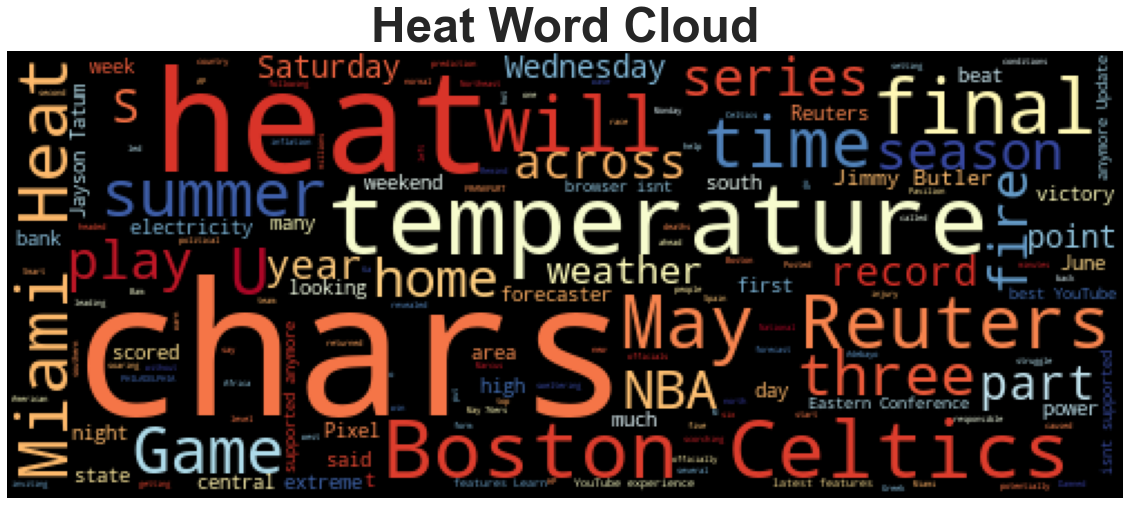

In [62]:
# Generate the Heat word cloud
wordcloud(Heat_df.text.str.cat(), title="Heat Word Cloud")

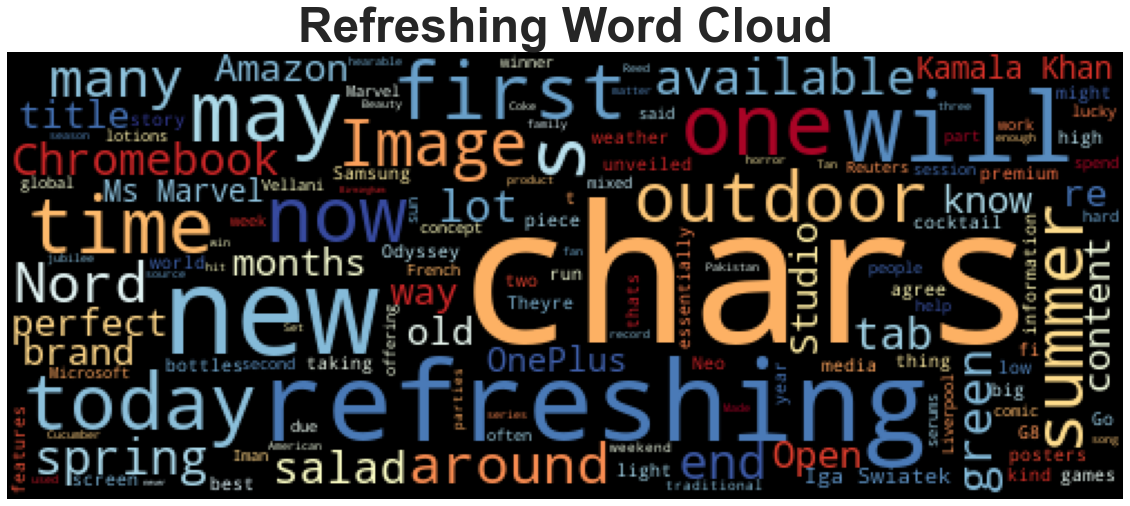

In [63]:
# Generate the Refreshing word cloud
wordcloud(Refreshing_df.text.str.cat(), title="Refreshing Word Cloud")


---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [64]:
import spacy
from spacy import displacy

In [65]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [66]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Heat NER

In [67]:
def listToString(s):    
    # initialize an empty string 
    str1 = " " 
    # return string   
    return (str1.join(s))

In [68]:
# Concatenate all of the Heat text together
Heat_big_string = listToString(Heat_df['text'])

In [69]:
# Run the NER processor on all of the text
Heat_doc = nlp(Heat_big_string)

# Add a title to the document
Heat_doc.user_data['title'] = 'Heat NER'

In [70]:
# Render the visualization
displacy.render(bitcoin_doc, style='ent')


In [71]:
# List all Entities
for ent in Heat_doc.ents:
    print(ent.text, ent.label_)

summer DATE
Taylor County GPE
Roberts PERSON
bee ORG
+843 PERSON
Jesse Amaro PERSON
Bronx GPE
one CARDINAL
lin PERSON
Democrats NORP
Senate ORG
about 10 CARDINAL
Trump ORG
India GPE
capital city GPE
Delhi GPE
Monday DATE
Boston Celtics ORG
Jimmy Butler PERSON
NBA ORG
six CARDINAL
Miami Heat FAC
2019 DATE
Jimmy Butler PERSON
47 CARDINAL
Miami Heat ORG
Boston Celtics ORG
111 CARDINAL
Boston GPE
Jayson Tatum PERSON
MVP ORG
The Boston Celtics ORG
NBA ORG
first ORDINAL
12 years DATE
Miami Heat ORG
100 CARDINAL
Bos PERSON
Marcus Smart ORG
five CARDINAL
three CARDINAL
the Heat
Marcus Smart ORG
Boston Celtics ORG
the Miami Heat LOC
millions CARDINAL
50C CARDINAL
MIT ORG
lightto GPE
Bam Adebayo PERSON
Jimmy Butler PERSON
the second half DATE
Bam Adebayo PERSON
31 CARDINAL
Miami Heat GPE
the Boston Celtics 109 ORG
Northeast LOC
late-season DATE
the Rocky Mountains LOC
The Greater Toronto Area WORK_OF_ART
first ORDINAL
this year DATE
Canada GPE
hundreds CARDINAL
British Columbia GPE
Lisa Lapointe

---

### Refreshing NER

In [72]:
# Concatenate all of the Refreshing text together
Refreshing_big_string = listToString(Refreshing_df['text'])

In [73]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
Refreshing_doc = nlp(Refreshing_big_string)

# Add a title to the document
Refreshing_doc.user_data['title'] = 'Refreshing NER'

In [74]:
# Render the visualization
displacy.render(Refreshing_doc, style='ent')

In [75]:
# List all Entities
for ent in Refreshing_doc.ents:
    print(ent.text, ent.label_)

Niantic ORG
The PGA Jr. League ORG
today DATE
Safari Par-Tee PERSON
AR PRODUCT
Prey PERSON
8 CARDINAL
Tuesday DATE
sci-fi ORG
the year DATE
the spring DATE
Coca-Cola ORG
Samsung ORG
Samsung ORG
32-inch QUANTITY
Odyssey Neo G8 FAC
1,500 MONEY
Chromebooks ORG
this spring DATE
two CARDINAL
510 CARDINAL
750 MONEY
1,100 MONEY
Italian NORP
Campari GPE
juice20 NORP
Thirsty Suitors PERSON
HP ORG
Today DATE
Envy ORG
Spectre ORG
the warmer months ahead DATE
summer DATE
Amazon ORG
Amazon ORG
Excel PRODUCT
one CARDINAL
Microsoft ORG
Office 365 FAC
Microsoft ORG
Iman Vellani PERSON
Kamala Khan PERSON
Marvel PERSON
Iman Vellani PERSON
Kamala Khan PERSON
Kamala Khan’s PERSON
Marvel PERSON
Marvel PERSON
2013 DATE
May 12 DATE
Reuters ORG
Rich Strike PERSON
next week's DATE
Preakness Stakes PRODUCT
Thursday DATE
the colder months DATE
Darwin Núñez PERSON
England GPE
Monday DATE
Liverpool ORG
100m MONEY
Benfica PERSON
Liverpool ORG
80 CARDINAL
today DATE
Buick‘s GPE
Ms Marvel ORG
Disney ORG
first ORDINAL

---